# Calculate Detector Counts: NEI, High-frequency Nanoflares
Compute detector counts, including non-equilibrium ionization.

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import h5py
import astropy.units as u
from astropy.visualization import AsinhStretch,ImageNormalize,SqrtStretch
import sunpy.map 
import distributed

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA
from synthesizAR.atomic import EmissionModel
from synthesizAR.visualize import plot_aia_channels

%matplotlib inline

In [2]:
client = distributed.Client()
client

Client Scheduler: tcp://127.0.0.1:38285 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')

In [4]:
em_model = EmissionModel.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/emission_model.json')

In [5]:
aia = InstrumentSDOAIA([0, 30000]*u.s,)
observer = synthesizAR.Observer(field, [aia], parallel=True)

In [6]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/',
                              ds=0.5 * u.Mm)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy-0.9.dev9659-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


In [7]:
futures = observer.flatten_detector_counts(emission_model=em_model)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/distributed/worker.py:739: UserWarning: Large object of size 3.42 MB detected in task graph: 
  (['interpolate_and_store-c2e58f5394d1da6a64fe94a78 ... AIA_counts.h5')
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


Now, compute the maps

In [7]:
bin_futures = observer.bin_detector_counts('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/',)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy-0.9.dev9659-py3.6-linux-x86_64.egg/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


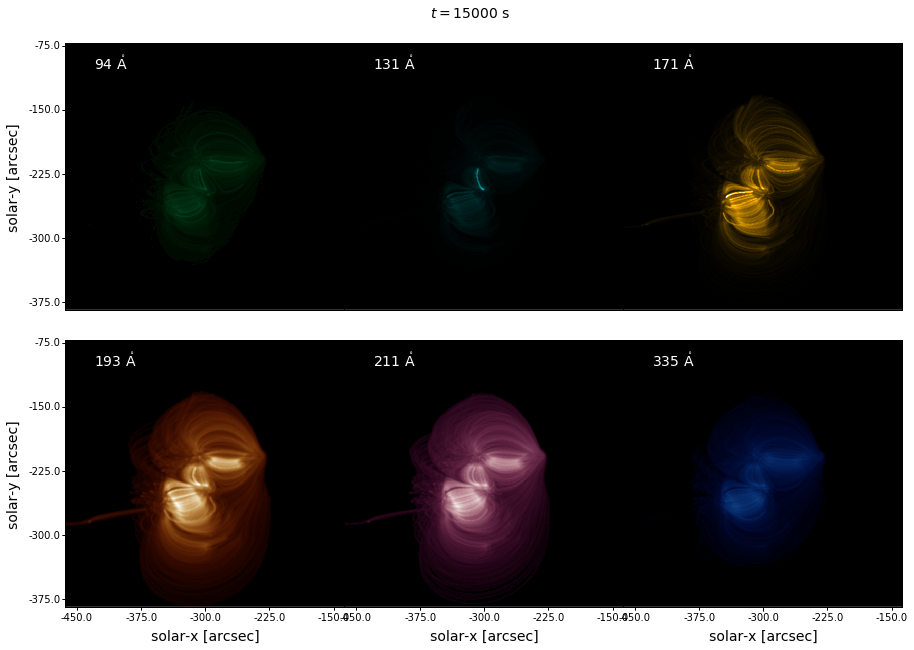

In [9]:
plot_aia_channels(aia,15.0e3*u.s,'/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/',
                  norm=ImageNormalize(stretch=SqrtStretch(),vmin=0,vmax=1e3))